In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential  # Space was missing between "models" and "import"
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default


In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize (creds)
worksheet = gc.open('Exp1-DL').sheet1
data = worksheet.get_all_values()


In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'X': 'float'})
dataset1 = dataset1.astype({'Y': 'float'})
dataset1.head()


,X,Y
0,1.0,21.0
1,2.0,54.0
2,3.0,75.0
3,4.0,98.0
4,5.0,24.0


In [ ]:
X = dataset1[['X']].values
y = dataset1[['Y']].values
#X
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)
ai_brain = Sequential ([
Dense (8, activation = 'relu'),
Dense (10, activation = 'relu'),
Dense (1)
])
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(X_train1, y_train, epochs =2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3685.7595
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3683.7422
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3682.3389
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3681.1887
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3680.1833
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3679.2708
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3678.4158
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3677.5986
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3676.8230
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3676.0745
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3675.3462
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3674.6333
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3673.9333
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3673.2410
Epoch 15/2000
1/1 ━━━━━━━━━━━━━

<Axes: >

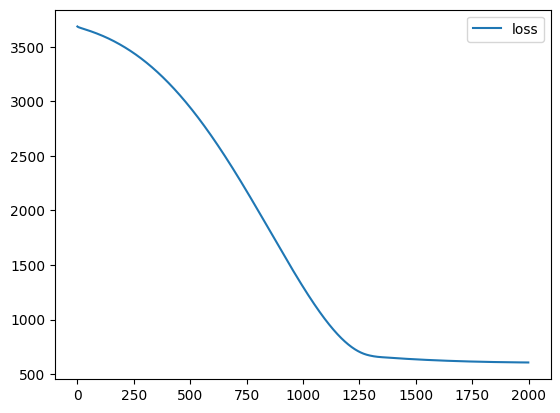

In [ ]:
# AAKASH P
# 212222110001
loss_df= pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1=Scaler.transform(X_test)
ai_brain.evaluate(X_test1, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 1084.0234


1084.0234375

In [ ]:
X_n1=[[7]]
X_n1_1=Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[53.297073]], dtype=float32)